In [1]:
import torch

In [2]:
dtype = torch.FloatTensor

batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10

x = torch.randn(batch_size, input_size).type(dtype) # type default : torch.FloatTensor
y = torch.randn(batch_size, output_size).type(dtype)

w1 = torch.randn(input_size, hidden_size).type(dtype)
w2 = torch.randn(hidden_size, output_size).type(dtype)

learning_rate = 1e-6

In [3]:
print(type(x), type(y), type(w1), type(w2))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [4]:
print(x.shape, y.shape, w1.shape, w2.shape)

torch.Size([64, 1000]) torch.Size([64, 10]) torch.Size([1000, 100]) torch.Size([100, 10])


In [5]:
all_losses = []

for i in range(500):
    # forward
    inh1 = x.mm(w1) # .mm : matrix multiplication
    outh1 = inh1.clamp(min=0) # (relu) .clamp :Clamps all elements in input to be larger or equal min 
    prediction = outh1.mm(w2)
    
    # loss
    loss = (prediction - y).pow(2).sum()
    all_losses.append(loss)
#     print('i = %d, loss = %d' %(i, loss))
    
    # backward (WE NEED 'grad_loss_w1', 'grad_loss_w2' for weight update)
    grad_loss_prediction = 2.0 * (prediction - y)
    grad_prediction_w2 = outh1
    grad_loss_w2 = grad_prediction_w2.t().mm(grad_loss_prediction)
    
    grad_prediction_outh1 = w2
    grad_loss_outh1 = grad_loss_prediction.mm(grad_prediction_outh1.t())
    grad_loss_inh1 = grad_loss_outh1.clone()
    grad_loss_inh1[inh1<0] = 0
    grad_inh1_w1 = x
    grad_loss_w1 = grad_inh1_w1.t().mm(grad_loss_inh1)
    
    # weight update
    w1 -= learning_rate * grad_loss_w1
    w2 -= learning_rate * grad_loss_w2

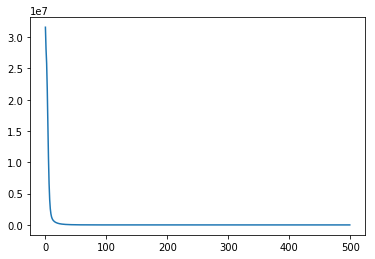

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)